In [20]:
import sys
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.DataPreparation import read_data, visualize_data
from FeatureExtraction.Hist.Hist import apply_hist
from sklearn.metrics import classification_report

In [21]:
mlq.start_quest('Hist-QDA', table_dest='../../')

#### Reading and Preprocessing

x_train shape:  (737, 256, 256, 3)
x_val shape:  (185, 256, 256, 3)


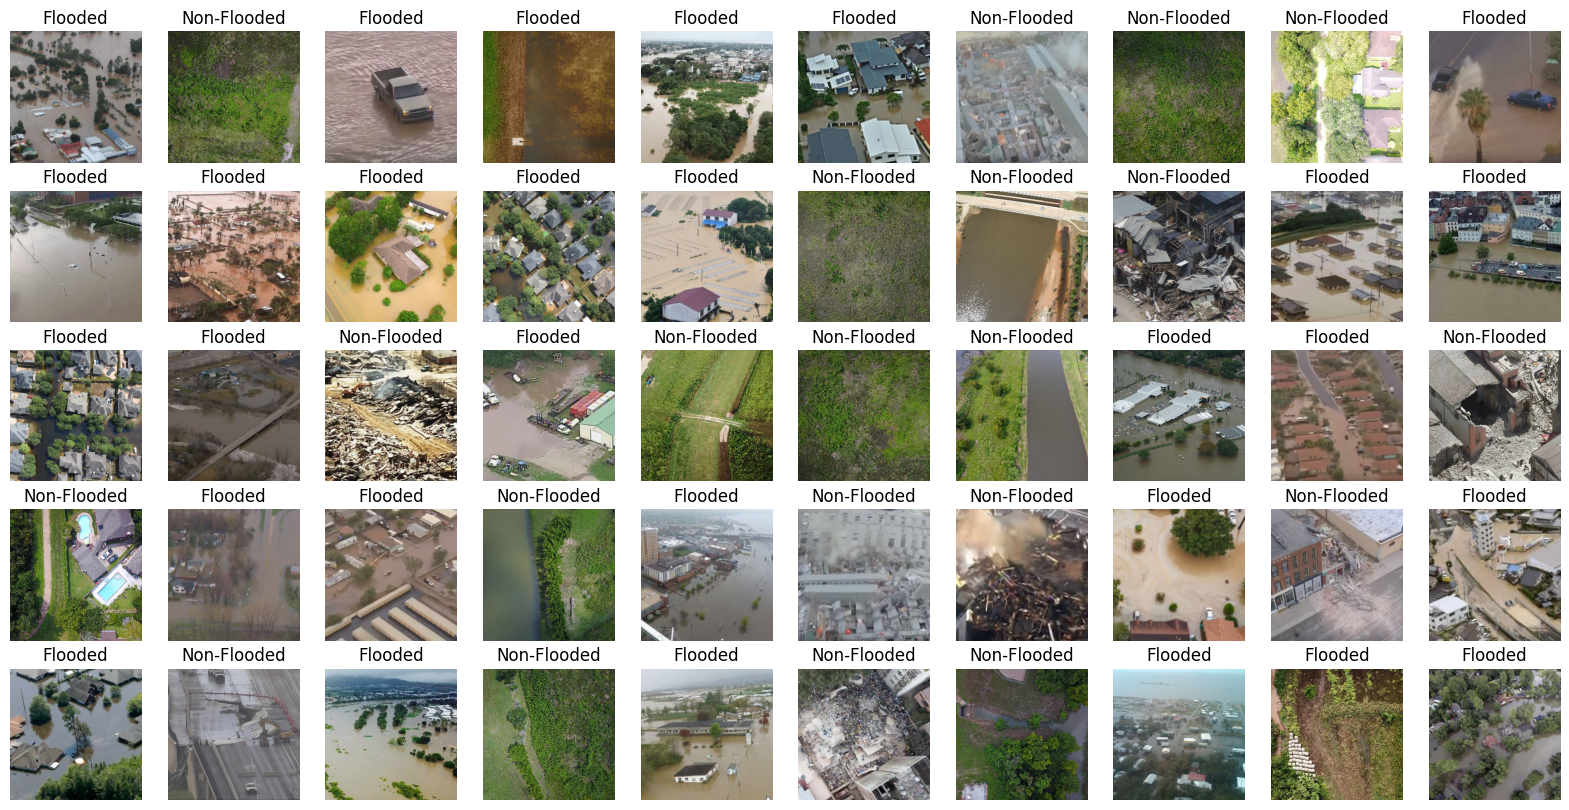

In [22]:
x_train_d, x_val_d, y_train_d, y_val_d = read_data(saved=True)
visualize_data(x_train_d, y_train_d, 10, 5)

#### Feature Extraction: Fractal Features

In [23]:
x_train_f, x_val_f = mlq.l(apply_hist)(x_train_d, x_val_d, n_bins=30, saved=True)

#### Initiating the Model

In [24]:
model = mlq.l(QuadraticDiscriminantAnalysis)(reg_param=0)

#### Training the model

In [25]:
model.fit(x_train_f, y_train_d)

/opt/anaconda3/envs/arm/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0)

#### Validate the model

In [26]:
F1 = metrics.f1_score(y_val_d, model.predict(x_val_f), average='macro').item()
Accuracy = metrics.accuracy_score(y_val_d, model.predict(x_val_f)).item()
mlq.log_metrics(Accuracy, F1)
report = classification_report(y_val_d, model.predict(x_val_f))
print(report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        87
           1       0.92      0.81      0.86        98

    accuracy                           0.86       185
   macro avg       0.86      0.86      0.86       185
weighted avg       0.87      0.86      0.86       185



In [27]:
mlq.end_quest()